<a href="https://colab.research.google.com/github/Hamxea/Experiments/blob/master/_With_Word2Vec_Pre_trained_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Label Text Classification of Text Document or News


 ### DATASET

Toxic Comment Classification dataset. a multi-label text classfication data consisting of many wikipedia comments which have been labeled by humans according to their relative toxicity comments labels such as "toxic", "severe_toxic", "obscene", "threat", "insult", and  "identity_hate". The dataset has approximately ~160k observation in total, ~125k with zero labels (toxicity) of any type, and approximately ~35k classified in one or more toxicity categories.




*   Dataset Link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge





#### DATA CHARACTERISTICS (TRAIN DATASET)
* Number of data points	159571
* Number data points of type toxic	15294
* Number data points of type severe_tocic	1595
* Number data points of type obscene	8449
* Number data points of type threat	478
* Number data points of type insult	7877
* Number data points of type identity_hate	1405
* Observations in one or more class	35098
* Unclassified observation	124473


### Import necessary libraries for the experiment

In [0]:
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='hamzasharoon', api_key='9le0c8M5GUNRAKyJoIt2')


# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

'apt' is not recognized as an internal or external command,
operable program or batch file.


"Double check with Python 3"


In [0]:
#from google.colab import files
#uploaded = files.upload()

#from google.colab import drive
#!kaggle competitions download -c Toxic Comment Classification Challenge -p /content/gdrive/My\ Drive/kaggle/Colab Notebooks/Dataset

### Loading the necessary data files and data Preparation

In [0]:
#Train data
train = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/train.csv')
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


### Clean the Train data, specifically remove punctuations

In [0]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in train['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

train['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0
5,00025465d4725e87,\n\nCongratulations from me as well use the to...,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [0]:
#Test data
df_test = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test.csv')
df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


### Clean the Test data, specifically remove punctuations

In [0]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in df_test['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

df_test['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then youll ...
1,0000247867823ef7,From RfC \n\n The title is fine as it is IMO
2,00013b17ad220c46,\n\n Sources \n\n Zawe Ashton on Lapland —...
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I dont anonymously edit articles at all
5,0001ea8717f6de06,Thank you for understanding I think very highl...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia Such e...
7,000247e83dcc1211,Dear god this site is horrible
8,00025358d4737918,\n Only a fool can believe in such numbers \n...
9,00026d1092fe71cc,Double Redirects \n\n When fixing double red...


In [0]:
df_test_labels = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test_labels.csv')

df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [0]:
test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


### Merge the df_test and test_labels into 1 dataframe (test)

In [0]:
#Merge the df_test and test_labels into 1 dataframe (test)
test = pd.merge(test_labels, df_test, on='id', how='inner')
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding I think very highl...
1,000247e83dcc1211,0,0,0,0,0,0,Dear god this site is horrible
2,0002f87b16116a7f,0,0,0,0,0,0,Somebody will invariably try to add Religion ...
3,0003e1cccfd5a40a,0,0,0,0,0,0,\n\n It says it right there that it IS a type...
4,00059ace3e3e9a53,0,0,0,0,0,0,\n\n Before adding a new product to the list...
5,000663aff0fffc80,0,0,0,0,0,0,this other one from 1897
6,000689dd34e20979,0,0,0,0,0,0,Reason for banning throwing \n\n This articl...
7,000844b52dee5f3f,0,0,0,0,0,0,blocked from editing Wikipedia
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
9,000968ce11f5ee34,0,0,0,0,0,0,Please stop If you continue to vandalize Wikip...


### Number of records in the train and test data

In [0]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (159571, 8)
Test data shape (63930, 8)


In [0]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values in train data.')
print('The dataset has', test.isna().sum().sum(), 'missing values in test data.')

# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates in train data.')
print('The dataset has', test.duplicated().sum(), 'duplicates in test data.')

The dataset has 0 missing values in train data.
The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.
The dataset has 0 duplicates in test data.


### CORRELATION BETWEEN DATA LABELS

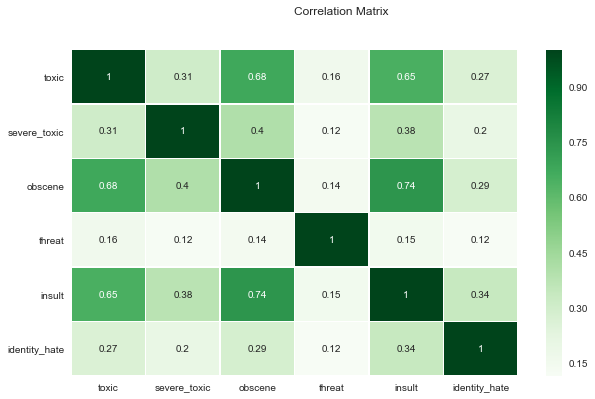

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

### DATA PREPROCESSING
Deep Neural Networks input layers make use of input variables to feed the network for training the model. But in this task (experiment), we're dealing with words text. How do we represent these words in order to feed our model?

In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.


#### Word Embedding
Two ways to feed embeddings to neural networks:
   * Using your own word embeddings by training
   * Using pre-trained embedding (e.g Word2vec, lad2vec, Glove etc)
   


In [0]:
#Convert text to vectors using keras preprocessing library tools

X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [0]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [0]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (159571, 200)
X_test shape:  (63930, 200)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [0]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

D:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [0]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model

In [0]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

# B) "Word2Vec" as a pre-Trained Embedding

Firstly, we separately learnt word embeddings and then pass to the embedding layer. This approach allows to use  pre-trained (Word2Vec) word embedding and also saves the time in training the classification model.

In this part of experiment, we used Geness implementaion of Word2Vec.

### Create the word tokens in order to prepare the Text corpus for leanring the embedding

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza.mohammed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza.mohammed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
toxicComments_lines = list()
lines = train['comment_text'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    
    #remove punctuation from each word
    table =  str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    #remove remaining tpkens gthat are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    #filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    toxicComments_lines.append(words)


len(toxicComments_lines)

159571

### Train the Word2Vec

In [0]:
#train word2vec mode
embedding_dims = 128 #embedding vector output dimension 
max_len = 200 #Max. number of words per toxic comment to be use
word2VecModel = gensim.models.Word2Vec(sentences=toxicComments_lines, size= embedding_dims, window=5, workers=4, min_count=1)
#vocab size
wors = list(word2VecModel.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 19


#### Test Word2Vec Model of the toxic comment corpus. We tried some word embeddings from the model learnt from the wikipedia toxic comment tran dataset

In [0]:
word2VecModel.wv.most_similar('shit')

[('ass', 0.8239984512329102),
 ('worthless', 0.8036755323410034),
 ('crap', 0.7981623411178589),
 ('fucking', 0.7737396955490112),
 ('garbage', 0.757102370262146),
 ('scum', 0.7314730882644653),
 ('lame', 0.7310490608215332),
 ('goddamn', 0.7293782234191895),
 ('retards', 0.7286981344223022),
 ('asshole', 0.728614866733551)]

In [0]:
#Let's see the reulst of semantically reasonable word vetors (king - man + woman)
word2VecModel.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

[('prince', 1.1039408445358276),
 ('pasais', 1.0856211185455322),
 ('kings', 1.0659501552581787),
 ('khan', 1.050336241722107),
 ('micklewhite', 1.04874587059021),
 ('princess', 1.0480540990829468),
 ('mary', 1.0480247735977173),
 ('emperor', 1.0473953485488892),
 ('jordan', 1.0459847450256348),
 ('grandfather', 1.0456427335739136)]

In [0]:
#Let us find the odd word woman, king, queen, movie = ?
#add word out
print(word2VecModel.wv.doesnt_match("woman king queen movie".split()))

D:\Program Files\Anaconda\lib\site-packages\gensim\models\keyedvectors.py:858: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



movie


#### Save the Word2Vec Corpus locally

In [0]:
#save model
filename = 'toxic_embedding_word2vec.txt'
word2VecModel.wv.save_word2vec_format(filename, binary=False)

### Use the Pre-Trained Embedding (Word2Vec) in our models (CNN, and RNN)

In [0]:
word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', 'toxic_embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

#### Convert the word embedding into tokenized vector

In [0]:
#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(toxicComments_lines)
sequences = tokenizer_obj.texts_to_sequences(toxicComments_lines)

#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s uniquue tokens.' % len(word_index))

toxicComments_pad = pad_sequences(sequences, maxlen=max_len)
comments_tag = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
print('Shape of toxic comments tensor', toxicComments_pad.shape)
print('Shape of comment tensor', comments_tag.shape)

Found 216407 uniquue tokens.
Shape of toxic comments tensor (159571, 200)
Shape of comment tensor (159571, 6)


#### We mapped the embeddings from the loaded word2vec model so that each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

In [0]:
num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, embedding_dims))

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

216408
216408
128


## 1) Convolutional Neural Network (CNN) with Word2Vec

In [0]:
CNN_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

CNN_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



#### Visualize the Orchestrated CNN-Glove Model Architecture

In [0]:
CNN_Word2Vec_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          27700224  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 100)          51300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
__________

In [0]:
#plot the CNN_Word2Vec_model architecture

#plot_model(CNN_Word2Vec_model, to_file='CNN_Word2Vec_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='CNN_Word2Vec_model_plot.png')

In [0]:
CNN_Word2Vec_model_fit = CNN_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 143613 samples, validate on 15958 samples
Epoch 1/15
143613/143613 [==============================] - 178s 1ms/step - loss: 0.1558 - acc: 0.9622 - mean_pred: 0.0384 - fmeasure: 0.0873 - precision: 0.4368 - auroc: 0.7424 - recall: 0.0528 - val_loss: 0.1097 - val_acc: 0.9656 - val_mean_pred: 0.0406 - val_fmeasure: 0.1507 - val_precision: 0.8721 - val_auroc: 0.8069 - val_recall: 0.0849
Epoch 2/15
143613/143613 [==============================] - 176s 1ms/step - loss: 0.1089 - acc: 0.9678 - mean_pred: 0.0373 - fmeasure: 0.2876 - precision: 0.7421 - auroc: 0.8297 - recall: 0.1850 - val_loss: 0.0943 - val_acc: 0.9703 - val_mean_pred: 0.0371 - val_fmeasure: 0.3547 - val_precision: 0.8956 - val_auroc: 0.8463 - val_recall: 0.2295
Epoch 3/15
143613/143613 [==============================] - 185s 1ms/step - loss: 0.1015 - acc: 0.9695 - mean_pred: 0.0369 - fmeasure: 0.3609 - precision: 0.7603 - auroc: 0.8569 - recall: 0.2440 - val_loss: 0.0896

#### Evaluate the CNN+Word2Vec Model accuracy of our trained model

In [0]:
CNN_Word2Vec_train_score = CNN_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', CNN_Word2Vec_train_score[0])
print('Train Accuracy:', CNN_Word2Vec_train_score[1])

159571/159571 [==============================] - 83s 518us/step
Train Loss: 0.07369316441043337
Train Accuracy: 0.9756545209005203


#### Evaluate the CNN+Word2Vec accuracy base our test samples

In [0]:
CNN_Word2Vec_test_score = CNN_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_Word2Vec_test_score[0])
print('Test Accuracy:', CNN_Word2Vec_test_score[1])

63930/63930 [==============================] - 33s 517us/step
Test Loss: 0.09204543822927316
Test Accuracy: 0.9701809297065938


In [0]:
#Predicting......
print('Predicting....')
y_pred = CNN_Word2Vec_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
63930/63930 [==============================] - 32s 500us/step


#### Plot Training & Validation Accuracy with the Loss values of the CNN-Word2Vec Model

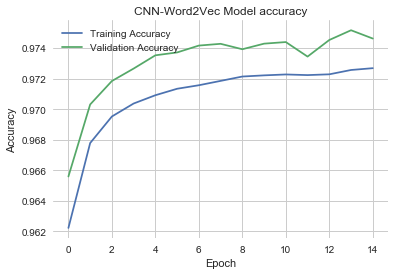

In [0]:
# Plot training & validation accuracy values
plt.plot(CNN_Word2Vec_model_fit.history['acc'])
plt.plot(CNN_Word2Vec_model_fit.history['val_acc'])
plt.title('CNN-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()


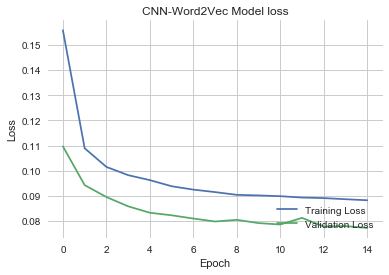

In [0]:
# Plot training & validation loss values
plt.plot(CNN_Word2Vec_model_fit.history['loss'])
plt.plot(CNN_Word2Vec_model_fit.history['val_loss'])
plt.title('CNN-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 2) Recurrent Neural Network (RNN) with Word2Vec

In [0]:
RNN_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [0]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

RNN_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, ])

####Visualize the Orchestrated RNN-Word2Vec Model Architecture

In [0]:
RNN_Word2Vec_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 128)          27700224  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 128)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 200, 25)           3850      
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 25)           100       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 25)           0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1300      
__________

In [0]:
#plot the RNN_Word2Vec_model architecture

#plot_model(RNN_Word2Vec_model, to_file='RNN_Word2Vec_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='RNN_Word2Vec_model_plot.png')

In [0]:
RNN_Word2Vec_model_fit = RNN_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Train on 143613 samples, validate on 15958 samples
Epoch 1/15
143613/143613 [==============================] - 66s 458us/step - loss: 0.1421 - acc: 0.9619 - mean_pred: 0.0374 - fmeasure: 0.0033 - precision: 0.0520 - auroc: 0.7461 - val_loss: 0.2119 - val_acc: 0.9627 - val_mean_pred: 0.1511 - val_fmeasure: 0.0282 - val_precision: 0.1969 - val_auroc: 0.7666
Epoch 2/15
143613/143613 [==============================] - 67s 469us/step - loss: 0.1348 - acc: 0.9636 - mean_pred: 0.0366 - fmeasure: 0.0098 - precision: 0.1444 - auroc: 0.7659 - val_loss: 0.1974 - val_acc: 0.9627 - val_mean_pred: 0.1331 - val_fmeasure: 0.0236 - val_precision: 0.1745 - val_auroc: 0.7686
Epoch 3/15
143613/143613 [==============================] - 67s 470us/step - loss: 0.1338 - acc: 0.9636 - mean_pred: 0.0366 - fmeasure: 0.0090 - precision: 0.1442 - auroc: 0.7698 - val_loss: 0.2043 - val_acc: 0.9627 - val_mean_pred: 0.1439 - val_fmeasure: 0.0258 - val_precision: 0.1865 - val_auroc: 0.7719
Epoch 4/15
143613/143613 [==

#### Evaluate the RNN+Word2Vec Model accuracy of our trained model

In [0]:
RNN_Word2Vec_train_score = RNN_Word2Vec_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', RNN_Word2Vec_train_score[0])
print('Train Accuracy:', RNN_Word2Vec_train_score[1])

143613/143613 [==============================] - 32s 225us/step
Train Loss: 0.14188053491089206
Train Accuracy: 0.9634422635366053


#### Evaluate the RNN+Word2Vec accuracy base our test samples

In [0]:
RNN_Word2Vec_test_score = RNN_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', RNN_Word2Vec_test_score[0])
print('Test Accuracy:', RNN_Word2Vec_test_score[1])

63930/63930 [==============================] - 14s 225us/step
Test Loss: 0.14499791420421634
Test Accuracy: 0.9622608067376613


In [0]:
#Predicting......
print('Predicting....')
y_pred = RNN_Word2Vec_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
63930/63930 [==============================] - 14s 220us/step


#### Plot Training & Validation Accuracy with the Loss values of the RNN-Word2Vec Model

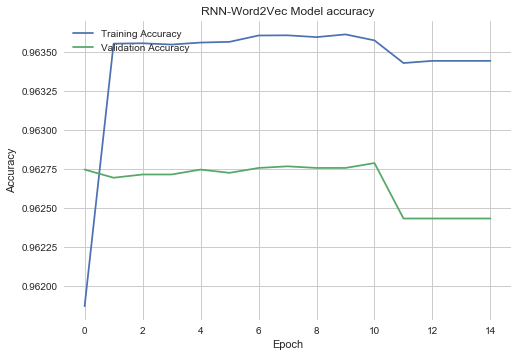

In [0]:
# Plot training & validation accuracy values
plt.plot(RNN_Word2Vec_model_fit.history['acc'])
plt.plot(RNN_Word2Vec_model_fit.history['val_acc'])
plt.title('RNN-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

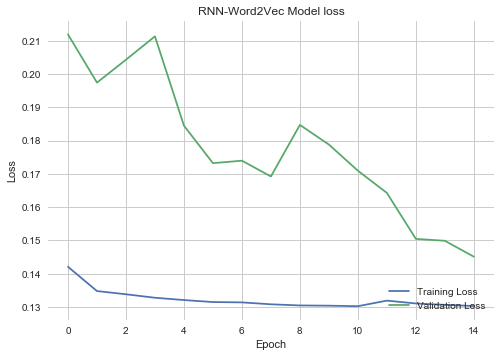

In [0]:
# Plot training & validation loss values
plt.plot(RNN_Word2Vec_model_fit.history['loss'])
plt.plot(RNN_Word2Vec_model_fit.history['val_loss'])
plt.title('RNN-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 3) LSTM with Word2Vec

In [0]:
LSTM_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

LSTM_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated LSTM-Word2Vec Model Architecture

In [0]:
LSTM_Word2Vec_model.summary()
#plot the CNN_GLove model architecture

#plot_model(LSTM_Word2Vec_model, to_file='LSTM_Word2Vec_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='LSTM_Word2Vec_model_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          27700224  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 25)           15400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 25)           100       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 25)           0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1300      
__________

In [0]:
LSTM_Word2Vec_model_fit = LSTM_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Train on 143613 samples, validate on 15958 samples
Epoch 1/15
143613/143613 [==============================] - 127s 887us/step - loss: 0.1228 - acc: 0.9643 - mean_pred: 0.0377 - fmeasure: 0.1556 - precision: 0.5306 - auroc: 0.8034 - recall: 0.0996 - val_loss: 0.1322 - val_acc: 0.9671 - val_mean_pred: 0.0833 - val_fmeasure: 0.2211 - val_precision: 0.8977 - val_auroc: 0.8486 - val_recall: 0.1305
Epoch 2/15
143613/143613 [==============================] - 126s 875us/step - loss: 0.1011 - acc: 0.9699 - mean_pred: 0.0368 - fmeasure: 0.3650 - precision: 0.7808 - auroc: 0.8610 - recall: 0.2460 - val_loss: 0.1109 - val_acc: 0.9711 - val_mean_pred: 0.0704 - val_fmeasure: 0.3898 - val_precision: 0.8829 - val_auroc: 0.8719 - val_recall: 0.2566
Epoch 3/15
143613/143613 [==============================] - 128s 890us/step - loss: 0.0985 - acc: 0.9705 - mean_pred: 0.0367 - fmeasure: 0.3797 - precision: 0.7857 - auroc: 0.8775 - recall: 0.2579 - val_loss: 0.1177 - val_acc: 0.9725 - val_mean_pred: 0.0824

### Evaluate the LSTM+Word2Vec train and test score

In [0]:
#train
LSTM_Word2Vec_train_score = LSTM_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_Word2Vec_train_score[0])
print('Train Accuracy:', LSTM_Word2Vec_train_score[1])

#test
LSTM_Word2Vec_test_score = LSTM_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_Word2Vec_test_score[0])
print('Test Accuracy:', LSTM_Word2Vec_test_score[1])

159571/159571 [==============================] - 78s 487us/step
Train Loss: 0.09723319408679866
Train Accuracy: 0.9736710783405389
63930/63930 [==============================] - 30s 471us/step
Test Loss: 0.11545219609859719
Test Accuracy: 0.9675113443624949


### Plot Training & Validation Accuracy with the Loss values of the LSTM-Word2Vec Model

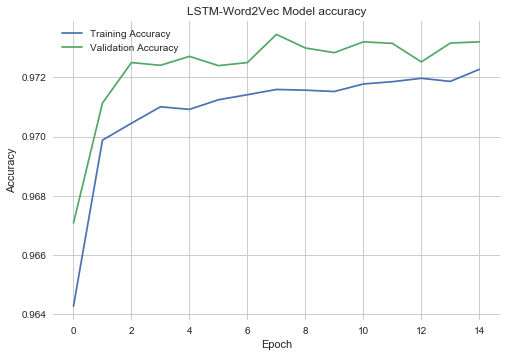

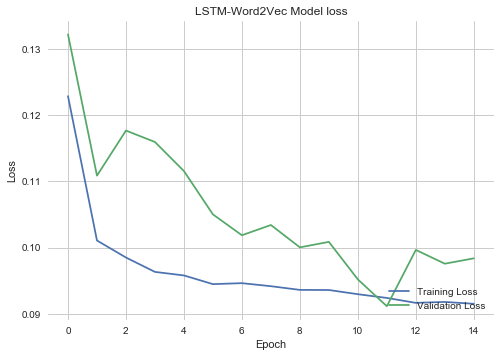

In [0]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_Word2Vec_model_fit.history['acc'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_acc'])
plt.title('LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(LSTM_Word2Vec_model_fit.history['val_loss'])
plt.title('LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 4) Bidirecitional LSTM with Word2Vec

In [0]:
Bil_LSTM_Word2Vec_model = Sequential([
    Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])


Bil_LSTM_Word2Vec_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated Bidirectional LSTM-Word2Vec Model Architecture

In [0]:
Bil_LSTM_Word2Vec_model.summary()
#plot the CNN_GLove model architecture

#plot_model(Bil_LSTM_Word2Vec_model, to_file='Bil_LSTM_Word2Vec_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='Bil_LSTM_Word2Vec_model_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 128)          27700224  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 200, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 50)           30800     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 50)           200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
__________

In [0]:
Bil_LSTM_Word2Vec_model_fit = Bil_LSTM_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Train on 143613 samples, validate on 15958 samples
Epoch 1/15
143613/143613 [==============================] - 331s 2ms/step - loss: 0.1250 - acc: 0.9651 - mean_pred: 0.0378 - fmeasure: 0.2337 - precision: 0.6094 - auroc: 0.7957 - recall: 0.1574 - val_loss: 0.1482 - val_acc: 0.9723 - val_mean_pred: 0.1159 - val_fmeasure: 0.5067 - val_precision: 0.7372 - val_auroc: 0.8556 - val_recall: 0.3932
Epoch 2/15
143613/143613 [==============================] - 306s 2ms/step - loss: 0.0950 - acc: 0.9709 - mean_pred: 0.0366 - fmeasure: 0.4134 - precision: 0.7653 - auroc: 0.8695 - recall: 0.2915 - val_loss: 0.1373 - val_acc: 0.9734 - val_mean_pred: 0.1099 - val_fmeasure: 0.5400 - val_precision: 0.7438 - val_auroc: 0.8796 - val_recall: 0.4293
Epoch 3/15
143613/143613 [==============================] - 302s 2ms/step - loss: 0.0911 - acc: 0.9717 - mean_pred: 0.0367 - fmeasure: 0.4415 - precision: 0.7733 - auroc: 0.8854 - recall: 0.3181 - val_loss: 0.1044 - val_acc: 0.9739 - val_mean_pred: 0.0726 - val

In [0]:
#train
Bil_LSTM_Word2Vec_train_score = Bil_LSTM_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_Word2Vec_train_score[0])
print('Train Accuracy:', LSTM_Word2Vec_train_score[1])

#test
Bil_LSTM_Word2Vec_test_score = Bil_LSTM_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_Word2Vec_test_score[0])
print('Test Accuracy:', LSTM_Word2Vec_test_score[1])

159571/159571 [==============================] - 139s 872us/step
Train Loss: 0.09178723680201413
Train Accuracy: 0.9764284703648329
63930/63930 [==============================] - 54s 850us/step
Test Loss: 0.10655896985580267
Test Accuracy: 0.9687653227309637


### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM-Word2Vec Model


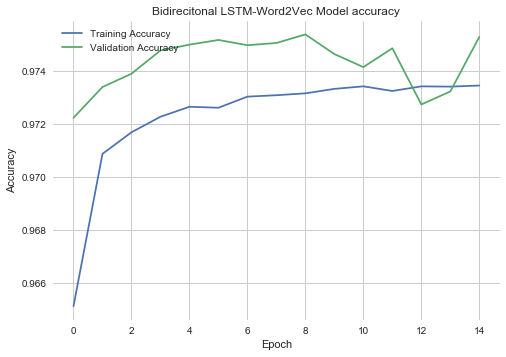

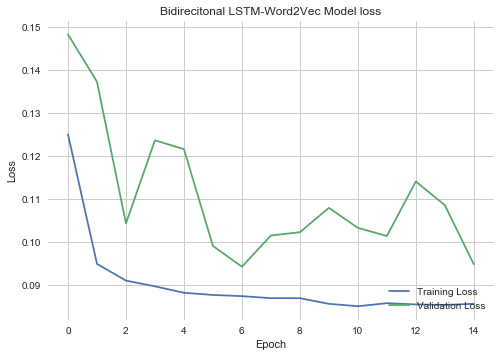

In [0]:

# Plot training & validation accuracy values
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['acc'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_acc'])
plt.title('Bidirecitonal LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirecitonal LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 5) Gated Recurrent (GRU) with Word2Vec

In [0]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
GRU_Word2Vec_model = Model(sequence_input, preds)
GRU_Word2Vec_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])


### Visualize the Orchestrated GRU+Word2Vec Model Architecture

In [0]:
GRU_Word2Vec_model.summary()

#plot the GRU model architecture

#plot_model(GRU_Word2Vec_model, to_file='GRU_Word2Vec_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='GRU_Word2Vec_model_plot.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 200, 128)     27700224    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_7 (SpatialDro (None, 200, 128)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 200, 128)     98688       spatial_dropout1d_7[0][0]        
__________________________________________________________________________________________________
conv1d_2 (

In [0]:
GRU_Word2Vec_model_fit = GRU_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Train on 143613 samples, validate on 15958 samples
Epoch 1/15
143613/143613 [==============================] - 1050s 7ms/step - loss: 0.1063 - acc: 0.9679 - mean_pred: 0.0412 - fmeasure: 0.3304 - precision: 0.6705 - auroc: 0.8155 - recall: 0.2403 - val_loss: 0.0772 - val_acc: 0.9752 - val_mean_pred: 0.0360 - val_fmeasure: 0.5629 - val_precision: 0.8001 - val_auroc: 0.8954 - val_recall: 0.4409
Epoch 2/15
143613/143613 [==============================] - 1207s 8ms/step - loss: 0.0752 - acc: 0.9761 - mean_pred: 0.0368 - fmeasure: 0.5725 - precision: 0.8065 - auroc: 0.9136 - recall: 0.4521 - val_loss: 0.0691 - val_acc: 0.9771 - val_mean_pred: 0.0412 - val_fmeasure: 0.6390 - val_precision: 0.7652 - val_auroc: 0.9253 - val_recall: 0.5542
Epoch 3/15
143613/143613 [==============================] - 1227s 9ms/step - loss: 0.0683 - acc: 0.9779 - mean_pred: 0.0367 - fmeasure: 0.6193 - precision: 0.8158 - auroc: 0.9322 - recall: 0.5070 - val_loss: 0.0641 - val_acc: 0.9790 - val_mean_pred: 0.0388 - 

### Evaluate the GRU+Word2Vec Model train and test score

In [0]:
#Train
GRU_Word2Vec_train_score = GRU_Word2Vec_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_Word2Vec_train_score[0])
print('Train Accuracy:', GRU_Word2Vec_train_score[1])

#Test
GRU_Word2Vec_test_score = GRU_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_Word2Vec_test_score[0])
print('Test Accuracy:', GRU_Word2Vec_test_score[1])

143613/143613 [==============================] - 303s 2ms/step
Train Loss: 0.04070346302665297
Train Accuracy: 0.9855154772578372
63930/63930 [==============================] - 135s 2ms/step
Test Loss: 0.09123550877569428
Test Accuracy: 0.9681213885317307


### Plot Training & Validation Accuracy with the Loss values of the GRU+ Word2Vec Model

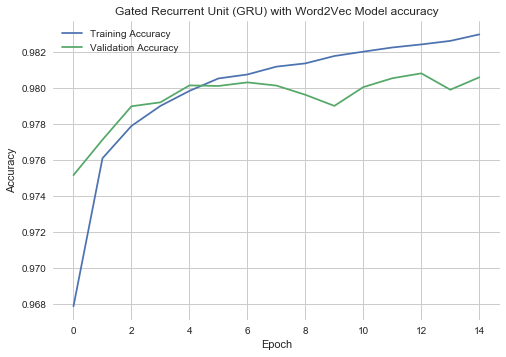

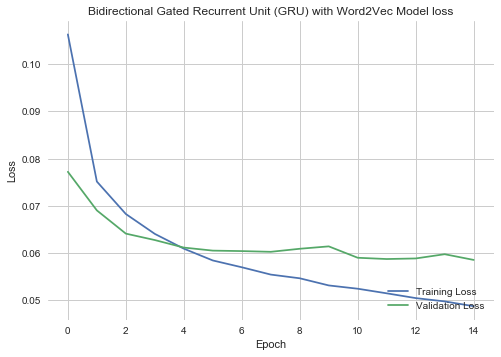

In [0]:
# Plot training & validation accuracy values
plt.plot(GRU_Word2Vec_model_fit.history['acc'])
plt.plot(GRU_Word2Vec_model_fit.history['val_acc'])
plt.title('Gated Recurrent Unit (GRU) with Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_Word2Vec_model_fit.history['loss'])
plt.plot(GRU_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 6) Bidirectional Gated Recurrent (GRU) + Word2Vec

In [0]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =word2Vec_embedding_matrix.shape[0], input_length=max_len, output_dim=word2Vec_embedding_matrix.shape[1],weights=[word2Vec_embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
Bil_GRU_Word2Vec_model = Model(sequence_input, preds)
Bil_GRU_Word2Vec_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated Bidirectional GRU+Word2Vec Model Architecture




In [0]:
Bil_GRU_Word2Vec_model.summary()

#plot the GRU model architecture

#plot_model(Bil_GRU_Word2Vec_model, to_file='Bil_GRU_Word2vec_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='Bil_GRU_Word2Vec_model_plot.png') 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 200, 128)     27700224    input_3[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_9 (SpatialDro (None, 200, 128)     0           embedding_9[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 200, 256)     197376      spatial_dropout1d_9[0][0]        
__________________________________________________________________________________________________
conv1d_4 (

In [0]:
Bil_GRU_Word2Vec_model_fit = Bil_GRU_Word2Vec_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val))

Train on 143613 samples, validate on 15958 samples
Epoch 1/15
143613/143613 [==============================] - 4910s 34ms/step - loss: 0.0961 - acc: 0.9706 - mean_pred: 0.0397 - fmeasure: 0.4134 - precision: 0.7010 - auroc: 0.8466 - recall: 0.3145 - val_loss: 0.0717 - val_acc: 0.9772 - val_mean_pred: 0.0385 - val_fmeasure: 0.6212 - val_precision: 0.7955 - val_auroc: 0.9144 - val_recall: 0.5151
Epoch 2/15
143613/143613 [==============================] - 5294s 37ms/step - loss: 0.0705 - acc: 0.9773 - mean_pred: 0.0369 - fmeasure: 0.6056 - precision: 0.8124 - auroc: 0.9280 - recall: 0.4921 - val_loss: 0.0661 - val_acc: 0.9787 - val_mean_pred: 0.0401 - val_fmeasure: 0.6667 - val_precision: 0.7866 - val_auroc: 0.9368 - val_recall: 0.5837
Epoch 3/15
143613/143613 [==============================] - 5246s 37ms/step - loss: 0.0642 - acc: 0.9789 - mean_pred: 0.0367 - fmeasure: 0.6440 - precision: 0.8222 - auroc: 0.9421 - recall: 0.5370 - val_loss: 0.0616 - val_acc: 0.9796 - val_mean_pred: 0.0386

### Evaluate the GRU+Word2Vec Model train and test score

In [0]:
#Train
Bil_GRU_Word2Vec_train_score = Bil_GRU_Word2Vec_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_GRU_Word2Vec_train_score[0])
print('Train Accuracy:', Bil_GRU_Word2Vec_train_score[1])

#Test
Bil_GRU_Word2Vec_test_score = Bil_GRU_Word2Vec_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_GRU_Word2Vec_test_score[0])
print('Test Accuracy:', Bil_GRU_Word2Vec_test_score[1])

159571/159571 [==============================] - 1140s 7ms/step
Train Loss: 0.03580597654456746
Train Accuracy: 0.9870632353361694
63930/63930 [==============================] - 454s 7ms/step
Test Loss: 0.0889850829968463
Test Accuracy: 0.970366034350372


### Plot Training & Validation Accuracy with the Loss values of the Bil GRU + Word2Vec Model

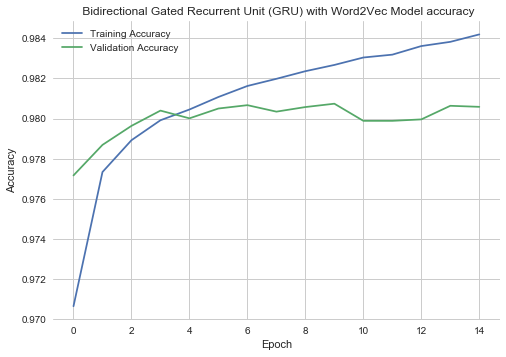

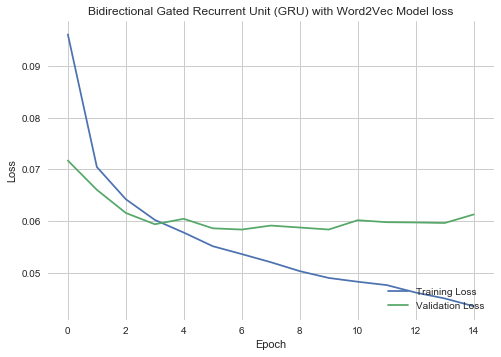

In [0]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_Word2Vec_model_fit.history['acc'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['val_acc'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) with Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_GRU_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Evaluation of Experiment With Word2Vec Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model) 

In [0]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'AUC'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN with word2Vec', 'RNNs with word2Vec', 'LSTM with word2Vec', ' Bidirectional LSTM with word2Vec', 'GRU with word2Vec', 'Bidirectional GRU with word2Vec'],
                       [
                        #Loss Evaluation
                        round(np.max(CNN_Word2Vec_model_fit.history['loss']), 3), round(np.max(RNN_Word2Vec_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.max(GRU_Word2Vec_model_fit.history['loss']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(CNN_Word2Vec_model_fit.history['acc']), 3), round(np.max(RNN_Word2Vec_model_fit.history['acc']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['acc']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['acc']), 3), round(np.max(GRU_Word2Vec_model_fit.history['acc']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['acc']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.max(CNN_Word2Vec_model_fit.history['mean_pred']), 3), round(np.max(RNN_Word2Vec_model_fit.history['mean_pred']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.max(GRU_Word2Vec_model_fit.history['mean_pred']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['mean_pred']), 3)],
						
                        #F1-Measure Evaluation fmeasure
                        [round(np.max(CNN_Word2Vec_model_fit.history['fmeasure']), 3), round(np.max(RNN_Word2Vec_model_fit.history['fmeasure']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.max(GRU_Word2Vec_model_fit.history['fmeasure']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['fmeasure']), 3)],
						             
                        #Precision Evaluation precision
                        [round(np.max(CNN_Word2Vec_model_fit.history['precision']), 3), round(np.max(RNN_Word2Vec_model_fit.history['precision']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.max(GRU_Word2Vec_model_fit.history['precision']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['precision']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.max(CNN_Word2Vec_model_fit.history['auroc']), 3), round(np.max(RNN_Word2Vec_model_fit.history['auroc']), 3), 
                        round(np.max(LSTM_Word2Vec_model_fit.history['auroc']), 3), round(np.max(Bil_LSTM_Word2Vec_model_fit.history['auroc']), 3), round(np.max(GRU_Word2Vec_model_fit.history['auroc']), 3),
                        round(np.max(Bil_GRU_Word2Vec_model_fit.history['auroc']), 3)]
                       
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Word2Vec_pre-trained_embedding_with the max of the evaluation matrics (per model) _table')

D:\Program Files\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Computing the mean average of the evaluation matrics (per model) 

In [0]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'AUC'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN with Word2Vec', 'RNNs with Word2Vec', 'LSTM with Word2Vec', ' Bidirectional LSTM with Word2Vec', 'GRU with Word2Vec', 'Bidirectional GRU with Word2Vec'],
                       [
                        #Loss Evaluation
                        round(np.mean(CNN_Word2Vec_model_fit.history['loss']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['loss']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.mean(CNN_Word2Vec_model_fit.history['acc']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['acc']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['loss']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['acc']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.mean(CNN_Word2Vec_model_fit.history['mean_pred']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['mean_pred']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['mean_pred']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['mean_pred']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['mean_pred']), 3)],
						
                        #F1-Measure Evaluation fmeasure
                        [round(np.mean(CNN_Word2Vec_model_fit.history['fmeasure']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['fmeasure']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['fmeasure']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['fmeasure']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['fmeasure']), 3)],
						             
                        #Precision Evaluation precision
                        [round(np.mean(CNN_Word2Vec_model_fit.history['precision']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['precision']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['precision']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['precision']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['precision']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.mean(CNN_Word2Vec_model_fit.history['auroc']), 3), round(np.mean(RNN_Word2Vec_model_fit.history['auroc']), 3), 
                        round(np.mean(LSTM_Word2Vec_model_fit.history['auroc']), 3), round(np.mean(Bil_LSTM_Word2Vec_model_fit.history['auroc']), 3), round(np.mean(GRU_Word2Vec_model_fit.history['auroc']), 3),
                        round(np.mean(Bil_GRU_Word2Vec_model_fit.history['auroc']), 3)]
                                              ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Word2Vec_trained_embedding_with the max of the evaluation matrics (per model) _table')

D:\Program Files\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [0]:
Image('multi-label_with the mean average of the evaluation matrics (per model) _table.png')

In [0]:
# concat all training, validation and testing accuracy scores

CNN_Word2Vec_Accuracy = ['Convolutional Neural Network (CNN) with Word2Vec', 
                np.mean(CNN_Word2Vec_model_fit.history['acc']), 
                np.mean(CNN_Word2Vec_model_fit.history['val_acc']), 
                CNN_Word2Vec_test_score[1]]

RNN_Word2Vec_Accuracy = ['Recurrent Neural Networks (RNNs) with Word2Vec', 
                np.mean(RNN_Word2Vec_model_fit.history['acc']), 
                np.mean(RNN_Word2Vec_model_fit.history['val_acc']), 
                RNN_Word2Vec_test_score[1]]

LSTM_Word2Vec_Accuracy = ['LSTM with Word2Vec', 
                  np.mean(LSTM_Word2Vec_model_fit.history['acc']), 
                  np.mean(LSTM_Word2Vec_model_fit.history['val_acc']), 
                  LSTM_Word2Vec_test_score[1]]

Bidirectional_LSTM_Word2Vec_Accuracy = ['Bidirectional LSTM with Word2Vec', 
                    np.mean(Bil_LSTM_Word2Vec_model_fit.history['acc']), 
                    np.mean(Bil_LSTM_Word2Vec_model_fit.history['val_acc']), 
                    Bil_LSTM_Word2Vec_test_score[1]]

GRU_Word2Vec_Accuracy = ['GRU Word2Vec', 
                    np.mean(GRU_Word2Vec_model_fit.history['acc']), 
                    np.mean(GRU_Word2Vec_model_fit.history['val_acc']), 
                    GRU_Word2Vec_test_score[1]]

Bidirectional_GRU_Word2Vec_Accuracy = ['Bidirectional GRU with Word2Vec', 
                    np.mean(Bil_GRU_Word2Vec_model_fit.history['acc']), 
                    np.mean(Bil_GRU_Word2Vec_model_fit.history['val_acc']), 
                    Bil_GRU_Word2Vec_test_score[1]]


# create dataframe
experimentalResult = pd.DataFrame([CNN_Word2Vec_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([CNN_Word2Vec_Accuracy, RNN_Word2Vec_Accuracy, LSTM_Word2Vec_Accuracy, Bidirectional_LSTM_Word2Vec_Accuracy, 
                                                GRU_Word2Vec_Accuracy, Bidirectional_GRU_Word2Vec_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult
print(experimentalResult)

                                                  Training Accuracy  \
Model                                                                 
Convolutional Neural Network (CNN) with Word2Vec           0.970797   
Convolutional Neural Network (CNN) with Word2Vec           0.970797   
Recurrent Neural Networks (RNNs) with Word2Vec             0.963426   
LSTM with Word2Vec                                         0.970907   
Bidirectional LSTM with Word2Vec                           0.972333   
GRU Word2Vec                                               0.979919   
Bidirectional GRU with Word2Vec                            0.980991   

                                                  Validation Accuracy  \
Model                                                                   
Convolutional Neural Network (CNN) with Word2Vec             0.973095   
Convolutional Neural Network (CNN) with Word2Vec             0.973095   
Recurrent Neural Networks (RNNs) with Word2Vec               0.96266